# Earth's Atmospheric Composition, Computer Practical 3

Mark Lunt (mark.lunt@ed.ac.uk)

## Contents

This lab is worth 25% of your total grade. It will be scored out of 100 points, of which 40 points are allocated to the practical questions and 60 points are allocated to the literature survey. **Please compile your answers from all parts of this lab and the literature survey into a single document for submission to Turnitin.**

This lab examines the global distribution of methane (CH$_4$) in the atmosphere. By the end of the lab you should have a better understanding of:
1. The latitudinal and vertical distribution of atmospheric CH$_4$
2. The seasonal cycle of CH$_4$
3. Sources of model error
4. How differences between observations and models can be used to improve our knowledge of emissions

<span style='color:Blue'> There are 10 questions that need answering, denoted by blue text. The proportion of marks for each question is given at the end of each question. </span> 

**To run the code below:**
1. Click on the cell you wish to run
2. Press SHIFT+ENTER on your keyboard or press the Run button in the toolbar above
3. A '#' at the beginning of a line denotes a comment. Remove the '#' to include that line in the code

The code is written in Python. No knowledge of coding is required, but you will need to edit some lines of code (i.e change variable names or add some additional lines based on examples).

**Before starting you need to upload the data file 'GEOSChem_CH4_4x5_2014_2015.nc' to your Jupyter hub. This file is in netcdf format which is a commonly used binary file format in the atmospheric and climate sciences. We read this file into a dataset in Python which allows us to view and plot each of the variables in the file.** 

**You will also need the file 'combined_noaa_v2022.csv' uploaded to your Jupyter hub.**

To start, **run the cell below** to import the Python packages that are necessary to run the code in this practical and to read in the netcdf file.




In [1]:
import numpy as np
import xarray
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colorbar as cbar
import matplotlib.colors as colors
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from ipywidgets import widgets, interact, interactive

# Open the netcdf file 
def open_ds(fname):
    with xarray.open_dataset(fname) as ds:
        ds.load()
    return ds

fname = 'GEOSChem_CH4_4x5_2014_2015.nc'
ds = open_ds(fname)

# Define the longitude and latitude arrays
lon = ds.lon.values
lat = ds.lat.values

## GEOS-Chem model

Below is some code to plot and analyze output from the global 3-D GEOS-Chem model. It is a state-of-the-science community model that has been used extensively to interpret aircraft, ground-based and space-borne observations of greenhouse gases. It is an atmospheric transport model, which means it uses pre-computed analyzed meteorology taken from large-scale weather prediction models that include lots of data to ensure the physical parameters closely describe the observed weather patterns. GEOS-Chem describes the physical and chemical processes associated with (in this example) atmospheric CH$_4$.

The code reads in output from a model simulation that has been run at a spatial resolution of 4 degrees (latitude) by 5 degrees (longitude), which is approximately 400 km by 500 km. The temporal resolution is monthly, which is sufficient to observe the seasonal cycle of atmospheric CH$_4$.

**Run the code in the cell below and answer the questions that follow.**

In [11]:
# Define the variable to plot e.g. CH4 or EUROPE or N_AMERICA_TEMP etc.
variable = 'CH4'  # Change this to change the tracer you are plotting.
ch4 = ds[variable]

# Set contour levels for map
if variable == 'CH4':
    clevels=np.arange(1760,2200,40)
    #clevels=np.arange(100,300,10) # An example of different contourf levels for plotting at higher levels.
else:
    clevels = np.arange(0,105,5)

    
def plot_map(time,level, interactive_contours=False):
    """
    Function to plot a 2D lat-lon contour map
    Inputs are time index and the vertical level index
    """
    # Establish a map to plot atmospheric CH4.
    fig,ax = plt.subplots(figsize=(12,10), subplot_kw=dict(projection=ccrs.PlateCarree()))
    #ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()

    # Plot the data
    if interactive_contours == False:
        p2 = ax.contourf(lon,lat,ch4[time,level,:,:], clevels, extend = 'both') 
    else:
        # For comparing vertical levels it helps to have interactive contours.
        p2 = ax.contourf(lon,lat,ch4[time,level,:,:], extend = 'both')  
    #####################################
    
    plt.colorbar(p2, orientation="vertical", extend="both", shrink=0.7, label = "CH4 mole fraction (ppb)")
    str_time = str(ch4.time[time].dt.year.values) + "-" + str(ch4.time[time].dt.month.values).zfill(2)
    plt.title('Monthly mean CH4 (ppb), ' + str_time)

    # Plot station locations
    #Mauna Loa, Hawaii
    lonuse = -155.6 # degrees W
    latuse = 19.5   # degrees N
    ax.plot(lonuse, latuse, 'ws', markersize=10)
    ax.text(lonuse+5, latuse, "MLO")
     #America Samoa
    lonuse = -170.5 # degrees W
    latuse = -14.2  # degrees N
    ax.plot(lonuse,latuse, 'w<', markersize=10)
    ax.text(lonuse+5, latuse, "SMO")
    #Mace Head 
    lonuse = -9.899 # degrees W
    latuse = 53.326 # degrees N
    ax.plot(lonuse,latuse, 'wo', markersize=10)
    ax.text(lonuse-20, latuse, "MHD")
    # Cape Grim
    lonuse = 144.689 # degrees N
    latuse = -44.800 # degrees E
    ax.plot(lonuse,latuse, 'r8', markersize=10)
    ax.text(lonuse-20, latuse, "CGO")
    
    # Add some latitude and longitude gridlines 
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.xlocator = mticker.FixedLocator([-180,-120,-60,0,60,120,180])
    gl.ylocator = mticker.FixedLocator([-90,-60,-30,0,30,60,90])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.top_labels = False
    gl.right_labels = False
    
# Create an interactive plot
interactive(plot_map,time=(0,11),level=(0,46,1))

interactive(children=(IntSlider(value=5, description='time', max=11), IntSlider(value=23, description='level',…

## Activity 1 (Geographical and seasonal variations)

The two sliders refer to the time (months from Jan 2014 to Dec 2014) and the vertical level (1 = near surface, 46 = top of the atmosphere). 

Start by looking at the lowest level and adjust the time from January through to December. 

1) <span style='color:Blue'> How do concentrations in the Northern Hemisphere and Southern Hemisphere compare, and why do any differences occur? </span> [4]

2) <span style='color:Blue'> In which regions of the world are concentrations largest, and what are the underlying causes? </span> [2]

Look at June 2014 and move up through the atmosphere to higher levels. It will help when comparing different vertical levels to select the "interactive_contours" box so the colour scale will adjust as you change levels. 

3) <span style='color:Blue'> What happens to the model CH$_4$ concentrations and the latitudinal distribution as you move up through the atmosphere and why? </span> [4]

4) <span style='color:Blue'> In the highest level the latitudinal distribution is very different to the lowest level. Why do you think this is? </span> [4]


**CH$_4$ from continental regions**

As well as the model tracking total atmospheric CH$_4$ we can also track the contribution from individual regions or source types. For example, in this model simulation the model fields have been tagged by their continental source regions. There are 11 source regions in total. These are:

1. ASIA_TROP (Tropical Asia)
2. AUSTRALIA 
3. EURASIA_BOR (Boreal Eurasia)
4. EURASIA_TEMP (Temperate Eurasia)
5. EUROPE 
6. N_AFRICA 
7. N_AMERICA_BOR (Boreal N. America)
8. N_AMERICA_TEMP (Temperate N. America)
9. S_AFRICA 
10. S_AMERICA_TEMP (Temperate S. America)
11. S_AMERICA_TROP (Tropical S. America)

Each one represents the concentration in the atmosphere due to emissions from the respective region since the start of the simulation. Through these "tagged" tracers we can track the signature of emissions from each of these regions around the globe. In the code, replace the variable 'CH4' with one of the regional variables (e.g. 'EUROPE'). 

Plot the distribution of a few of these regional tracers to famliarize yourself with how the distribution varies in time, and the magnitude of the regional enhancements at different points around the globe.

We will explore these "tagged" tracers more later in the lab.


## Activity (Time series)
There are four symbols superimposed on the 2-D map above: the white circle, the square, the leftward arrow head, and the red circle denote the position of Mace Head, Ireland; Mauna Loa Hawaii; American Samoa, and Cape Grim, Australia stations, respectively. These represent four of the NOAA observatories that are intentionally located far from local sources so that they can sample atmospheric GHGs representative of large spatial scales. 

Below is some code that extracts the full annual time series between Jan 2014 to Dec 2015 from a particular geographical location defined by the latitude and longitude. 

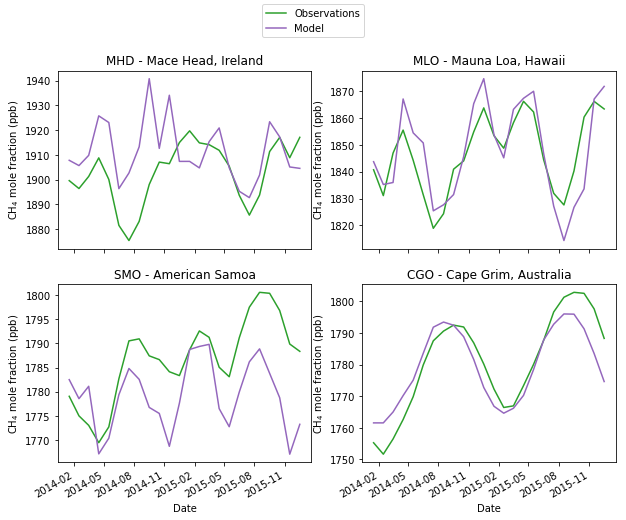

In [16]:
# Code to plot model timeseries

# 1. Read data (Read in single csv file with monthly mean data for each site)
noaa_file = 'combined_noaa_v2022.csv'
df_noaa = pd.read_csv(noaa_file)

# 2. Read model at site locations
sites = ["MHD", "MLO", "SMO", "CGO"] # Mace Head, Mauna Loa, Samoa, Cape Grim

lon_sites={"MHD":-9.9,
          "MLO": -155.6,
          "SMO": -170.5,
          "CGO": 144.7}

lat_sites={"MHD":53.3,
          "MLO": 19.5,
          "SMO": -14.2,
          "CGO": -44.8}

data_time = ch4.time.values

model_site={}
model_data = ds["CH4"]
#model_data = ds["EUROPE"] 
for site in sites:
    lon_si = lon_sites[site]
    lat_si = lat_sites[site]
    model_site[site] = model_data[:,1,:,:].sel(lon=lon_si, lat=lat_si, method="nearest")

# 3. Set up figure to plot the 4 sites on 4 different axes. 

fig2,axes2 = plt.subplots(2,2,figsize=(10,8),sharex=True)
axs2 = axes2.ravel()

axs2[0].plot(data_time, df_noaa["MHD"], color="C2", label = "Observations" )
axs2[0].plot(data_time, model_site["MHD"], color="C4", label = "Model" )

axs2[1].plot(data_time, df_noaa["MLO"], color="C2" )
axs2[1].plot(data_time, model_site["MLO"], color="C4" )

# Add data to other axes here...
axs2[2].plot(data_time, df_noaa["SMO"], color="C2" )
axs2[2].plot(data_time, model_site["SMO"], color="C4" )

axs2[3].plot(data_time, df_noaa["CGO"], color="C2" )
axs2[3].plot(data_time, model_site["CGO"], color="C4" )


# Set axis titles
axs2[0].set_title("MHD - Mace Head, Ireland")
axs2[1].set_title("MLO - Mauna Loa, Hawaii")
axs2[2].set_title("SMO - American Samoa")
axs2[3].set_title("CGO - Cape Grim, Australia")

for axi in range(4):
    axs2[axi].set_xlabel("Date")
    axs2[axi].set_ylabel("CH$_4$ mole fraction (ppb)")
    #axs2[axi].set_ylim([130,220])
    
# Tidy up date formatting
fig2.autofmt_xdate()    

# Add a single legend above the subplots 
handles, labels = axs2[0].get_legend_handles_labels()
fig2.legend(handles, labels, loc='upper center')

5) <span style='color:Blue'>What do you observe regarding the seasonal cycle at each site? Explain the seasonal cycles and the differences between sites taking into account the latitudes of each of the sites.</span> [6]

6) <span style='color:Blue'>How does the modelled CH$_4$ compare to the observations at each of the sites? Are some sites better modelled that others and why do you think this is?</span> [6]

## Activity (Detecting a change in emissions)

So far we have examined general features of the modelled distribution of atmopheric CH$_4$ and how this compares to measurements. In this section we will explore how we can use this comparison of the model with observational data to refine our model inputs. 

In the following example we will use a fresh set of observational data. Although the problem we address here is manufactured and not based on real data, it is representative of how we can use these model data comparisons to refine our estimates of greenhouse gas emissions. 

**The goal of this activity is to find an updated estimate of input model emissions based on the observational data.**
 
The observations are from the same 4 sites, but the site codes are now named MHD2, MLO2, SMO2 and CGO2 to reflect the fact we are using synthetic observations. Run the code below to generate a new collection of model and observational comparison plots for the 2-year period from 2014-2015. 

In this example the model is perfect, except for the input emissions from one of the 11 continental regions. You need to work out from which one.  

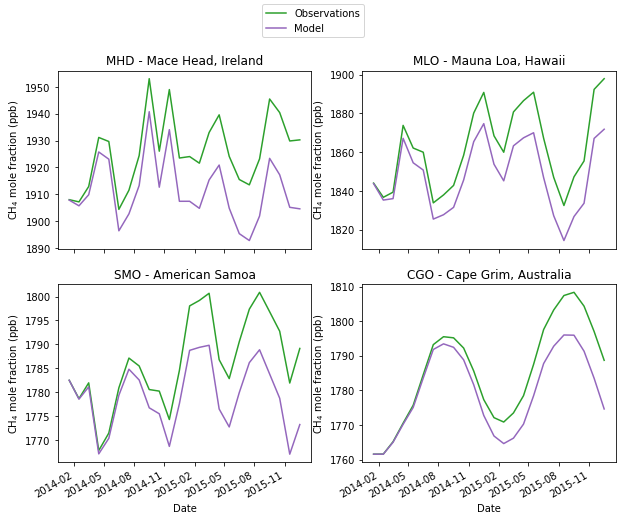

In [17]:
# Read in new set of observations
sites2 = ["MHD2", "MLO2", "SMO2", "CGO2"]
lon_sites2={"MHD2":-9.9,
          "MLO2": -155.6,
          "SMO2": -170.5,
          "CGO2": 144.7}

lat_sites2={"MHD2":53.3,
          "MLO2": 19.5,
          "SMO2": -14.2,
          "CGO2": -44.8}

model_site2={}
model_data2 = ds["CH4"]
#model_data = ds["EUROPE"] 
for site in sites2:
    lon_si = lon_sites2[site]
    lat_si = lat_sites2[site]
    model_site2[site] = model_data2[:,1,:,:].sel(lon=lon_si, lat=lat_si, method="nearest")

fig3,axes3 = plt.subplots(2,2,figsize=(10,8),sharex=True)
axs3 = axes3.ravel()

axs3[0].plot(data_time, df_noaa["MHD2"], color="C2", label = "Observations" )
axs3[0].plot(data_time, model_site2["MHD2"], color="C4", label = "Model" )

axs3[1].plot(data_time, df_noaa["MLO2"], color="C2" )
axs3[1].plot(data_time, model_site2["MLO2"], color="C4" )

axs3[2].plot(data_time, df_noaa["SMO2"], color="C2" )
axs3[2].plot(data_time, model_site2["SMO2"], color="C4" )

axs3[3].plot(data_time, df_noaa["CGO2"], color="C2" )
axs3[3].plot(data_time, model_site2["CGO2"], color="C4" )

for axi in range(4):
    axs3[axi].set_xlabel("Date")
    axs3[axi].set_ylabel("CH$_4$ mole fraction (ppb)")
    
# Set axis titles
axs3[0].set_title("MHD - Mace Head, Ireland")
axs3[1].set_title("MLO - Mauna Loa, Hawaii")
axs3[2].set_title("SMO - American Samoa")
axs3[3].set_title("CGO - Cape Grim, Australia")    

fig3.autofmt_xdate()    

handles, labels = axs3[0].get_legend_handles_labels()
fig3.legend(handles, labels, loc='upper center')

7) <span style='color:Blue'>Compare the observations with the model 'CH4' variable. Are the model emissions larger or smaller than the true emissions? How can you tell?</span> [2]

8) <span style='color:Blue'> Compare the observational data and the model CH4 variable at each site. How does the difference between model and observations vary between different sites over time, and what does this tell you about the region where model emissions may be wrong? </span> [4]
    
   
To help narrow down where the emissions difference is coming from we can look at the regional tracers explored earlier. The relationship between the concentration of each regional tracer at each observation site and the total emissions of each regional tracer is linear, such that a doubling of emissions from the EUROPE region will lead to a doubling in the EUROPE tracer concentration. 

Run the cell below to plot the difference between observations and model at each site (green circles). The plots also show the effect of a 5%, 10% and 20% increase in regional tracer emissions from the EUROPE region.

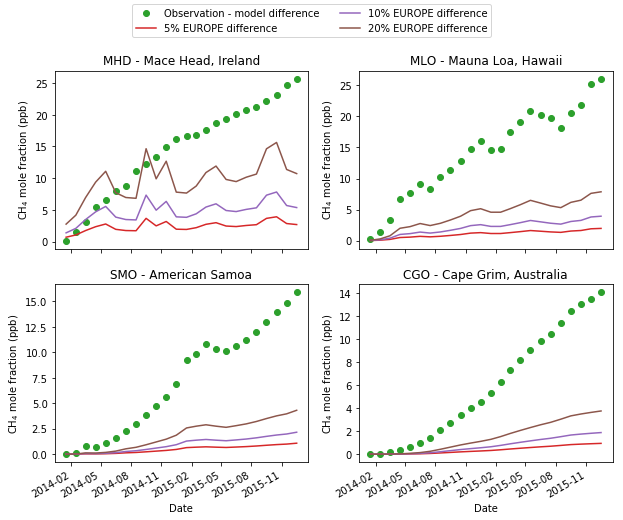

In [18]:
# Change the region to explore the signal of other regional tracers
region = "EUROPE"


tracer_site={}
tracer_data = ds[region]

for site in sites2:
    lon_si = lon_sites2[site]
    lat_si = lat_sites2[site]
    tracer_site[site] = tracer_data[:,1,:,:].sel(lon=lon_si, lat=lat_si, method="nearest")

fig3,axes3 = plt.subplots(2,2,figsize=(10,8),sharex=True)
axs3 = axes3.ravel()

for si, site in enumerate(sites2):
    axs3[si].plot(data_time, df_noaa[site]-model_site2[site], 'o', color="C2", label = "Observation - model difference" )
    axs3[si].plot(data_time, tracer_site[site]*0.05, color="C3", label = "5% " + region + " difference" )
    axs3[si].plot(data_time, tracer_site[site]*0.1, color="C4", label = "10% " + region + " difference" )
    axs3[si].plot(data_time, tracer_site[site]*0.2, color="C5", label = "20% " + region + " difference" )


for axi in range(4):
    axs3[axi].set_xlabel("Date")
    axs3[axi].set_ylabel("CH$_4$ mole fraction (ppb)")
    
axs3[0].set_title("MHD - Mace Head, Ireland")
axs3[1].set_title("MLO - Mauna Loa, Hawaii")
axs3[2].set_title("SMO - American Samoa")
axs3[3].set_title("CGO - Cape Grim, Australia") 
    
fig3.autofmt_xdate()    
handles, labels = axs3[0].get_legend_handles_labels()
fig3.legend(handles, labels, loc='upper center', ncol=2)

Plot the difference for each of the 11 regional tracers (ASIA_TROP, AUSTRALIA, EURASIA_BOR, EURASIA_TEMP, EUROPE, N_AFRICA,  N_AMERICA_BOR, N_AMERICA_TEMP, S_AFRICA, S_AMERICA_TEMP, S_AMERICA_TROP).  

9) <span style='color:Blue'>By examining the responses can you tell which of the 11 regions has the incorrect emissions magnitude? Based on the data, what is your updated emissions estimate from this region as a fraction of the initial model input?</span> [2]

10) <span style='color:Blue'>This is a simplified example of a real-life problem. In reality what other factors do we need to take into consideration when examining the divergence of model concentrations and observations? </span> [6]

## Literature Survey

Read the three recent journal articles below. In 300 words, summarize the papers in the context of the following questions:

1) How well do we understand the causes behind the recent growth in atmospheric methane? 

2) How important are CH$_4$ isotopes for understanding recent trends?

Mikaloff-Fletcher and Schaefer, Rising methane: A new climate challenge, 2019
https://science.sciencemag.org/content/sci/364/6444/932.full.pdf

Turner et al, Interpreting contemporary trends in atmospheric methane, 2019
https://www.pnas.org/content/pnas/116/8/2805.full.pdf

Nisbet et al, Very Strong Atmospheric Methane Growth in the 4 Years 2014–2017: Implications for the Paris Agreement, 2019
https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/2018GB006009
